<h1> Lunar Landing Environment. Data Exploration </h1>

<h3> Environment: <a href="https://gymnasium.farama.org/environments/box2d/lunar_lander/"> Lunar Lander v2  </a> </h3>

* Classic rocket trajectory optimization problem
* <b>Discrete actions:</b> engine <b>on</b> or <b>off</b> 
    * (Pontryagin’s maximum principle => it is optimal to fire the engine at full throttle or turn it off)
* <b>Two environment versions:</b> discrete or continuous (discrete in our case)
* <b> Fuel is infinite </b> => the agent can learn to fly and then land on its first attempt


<h3> States </h3>

*   8-dimensional vectors:
    * [0]: x coordinate
    * [1]: y coordinate
    * [2]: linear velocity in x
    * [3]: linear velocity in y
    * [4]: Lander`s angle
    * [5]: Lander`s angular velocity
    * [6]: Leg 1 contacts the land (boolean)
    * [7]: Leg 2 contacts the land (boolean)

*   <b> Initial State:</b>
    * <b>x, y:</b> starts at the top center of the viewport
    * random initial force applied to its center of mass.

<h3> Action Space </h3>

* 0: do nothing
* 1: fire left orientation engine
* 2: fire main engine
* 3: fire right orientation engine

<h3> Rewards </h3>
After every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode.

For each timestep, the reward:
* is increased/decreased the closer/further the lander is to the landing pad.
* is increased/decreased the slower/faster the lander is moving.
* is decreased the more the lander is tilted (angle not horizontal).
* +10 points for each leg that is in contact with the ground.
* -0.03 points each frame a side engine is firing.
* -0.3 points each frame the main engine is firing.

The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.
An episode is considered a solution if it scores at least 200 points.

In [1]:
# navigates to the main project folder
import sys
import os
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from src.utils.data_loading import *
from src.utils.plotting import *

import gymnasium as gym
from gymnasium.envs.registration import register

ModuleNotFoundError: No module named 'src.utils.visualization_utils'

<h2> Loading the data </h2>

In [3]:
# works also for 'final_policy.npz'
rb_observations, rb_next_observations, rb_actions, rb_rewards, rb_dones = load_data()
fp_observations, fp_next_observations, fp_actions, fp_rewards, fp_dones = load_data('../data/final_policy.npz')

In [5]:
print(rb_observations.shape)
print(fp_observations.shape)

(1000000, 8)
(1000000, 8)


In [3]:
# minimal example for creating the correct environment
# Register the deprecated environment manually
register(
    id="LunarLander-v2",
    entry_point="gymnasium.envs.box2d:LunarLander",
    max_episode_steps=1000,
    reward_threshold=200,
)

# Separate env for evaluation
env = gym.make("LunarLander-v2")

NameError: name 'register' is not defined

In [12]:
rb_observations.shape

(1000000, 8)

<h3> Data Exploration  </h3>

In [6]:
state_xy_data_dict = {
    'Replay Buffer Current States (x,y coordinates)': rb_observations[:, 0:2],
    'Final Policy Current States (x,y coordinates)': fp_observations[:, 0:2],
    'Replay Buffer Next States (x,y coordinates)': rb_next_observations[:, 0:2],
    'Final Policy Next States (x,y coordinates)': fp_next_observations[:, 0:2]
}

actions_data_dict = {
    'Replay Buffer Actions': rb_actions,
    'Final Policy Actions': fp_actions
}

velocity_dict = {
    'Replay Buffer Linear Velocities (x,y coordinates)': rb_observations[:, 3:4], #3:5 for hexbin
    'Final Policy Linear Velocities (x,y coordinates)': fp_observations[:, 3:4]
}

angle_dict = {
    'Replay Buffer Lander`s angle':rb_observations[:, 4],
    'Replay Buffer Lander`s angular velocity':fp_observations[:, 4],
    'Final Policy Lander`s angle': rb_observations[:, 5],
    'Final Policy Lander`s angular velocity': fp_observations[:, 5]
}

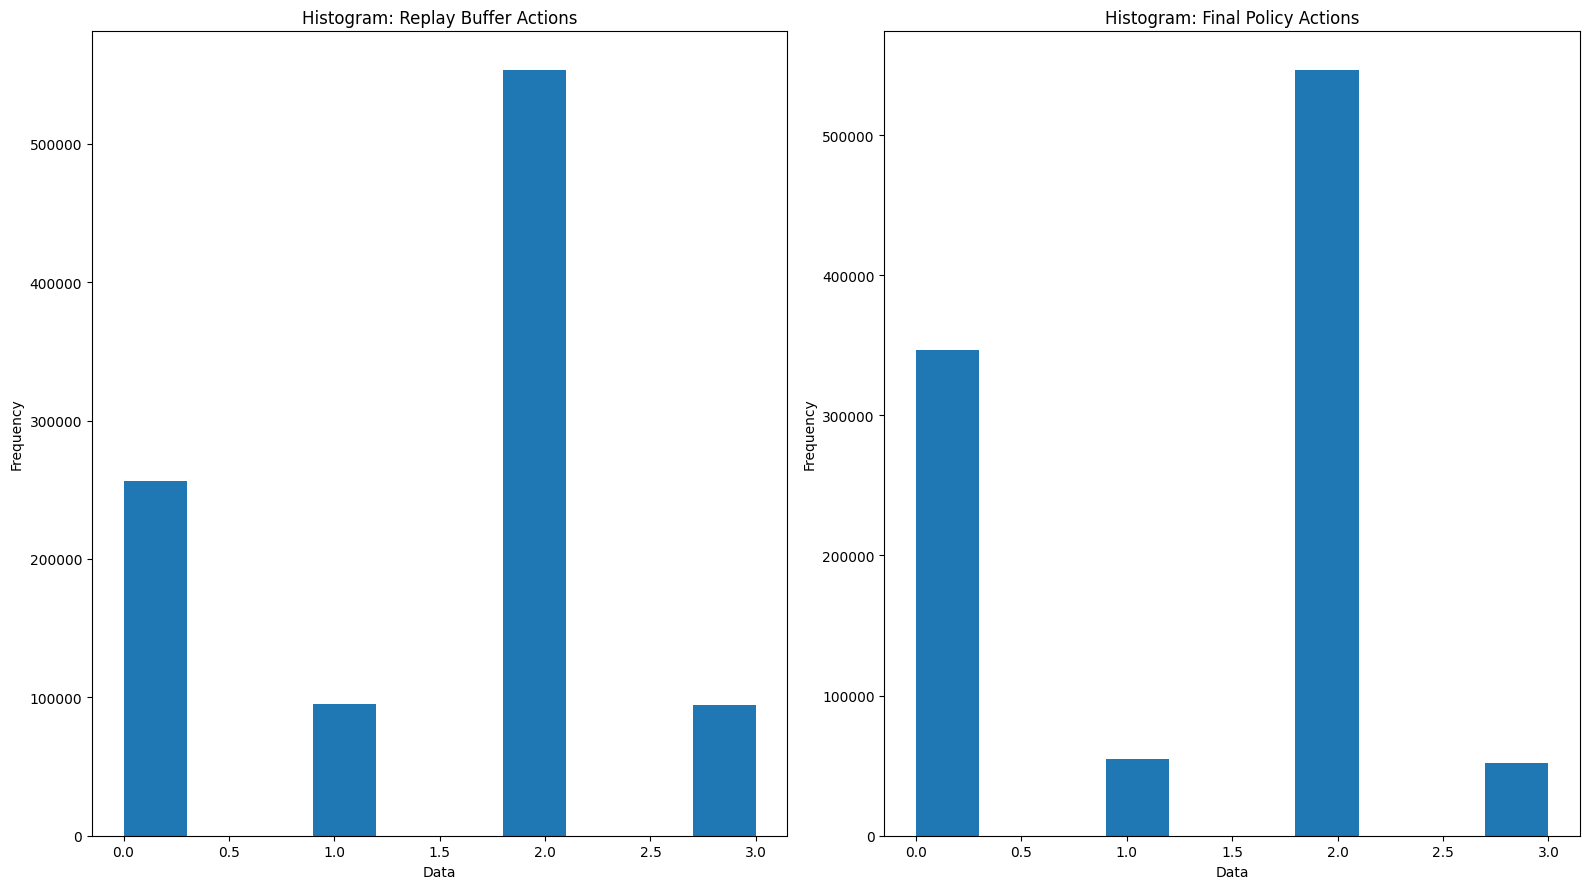

In [7]:
plot_hist(actions_data_dict)

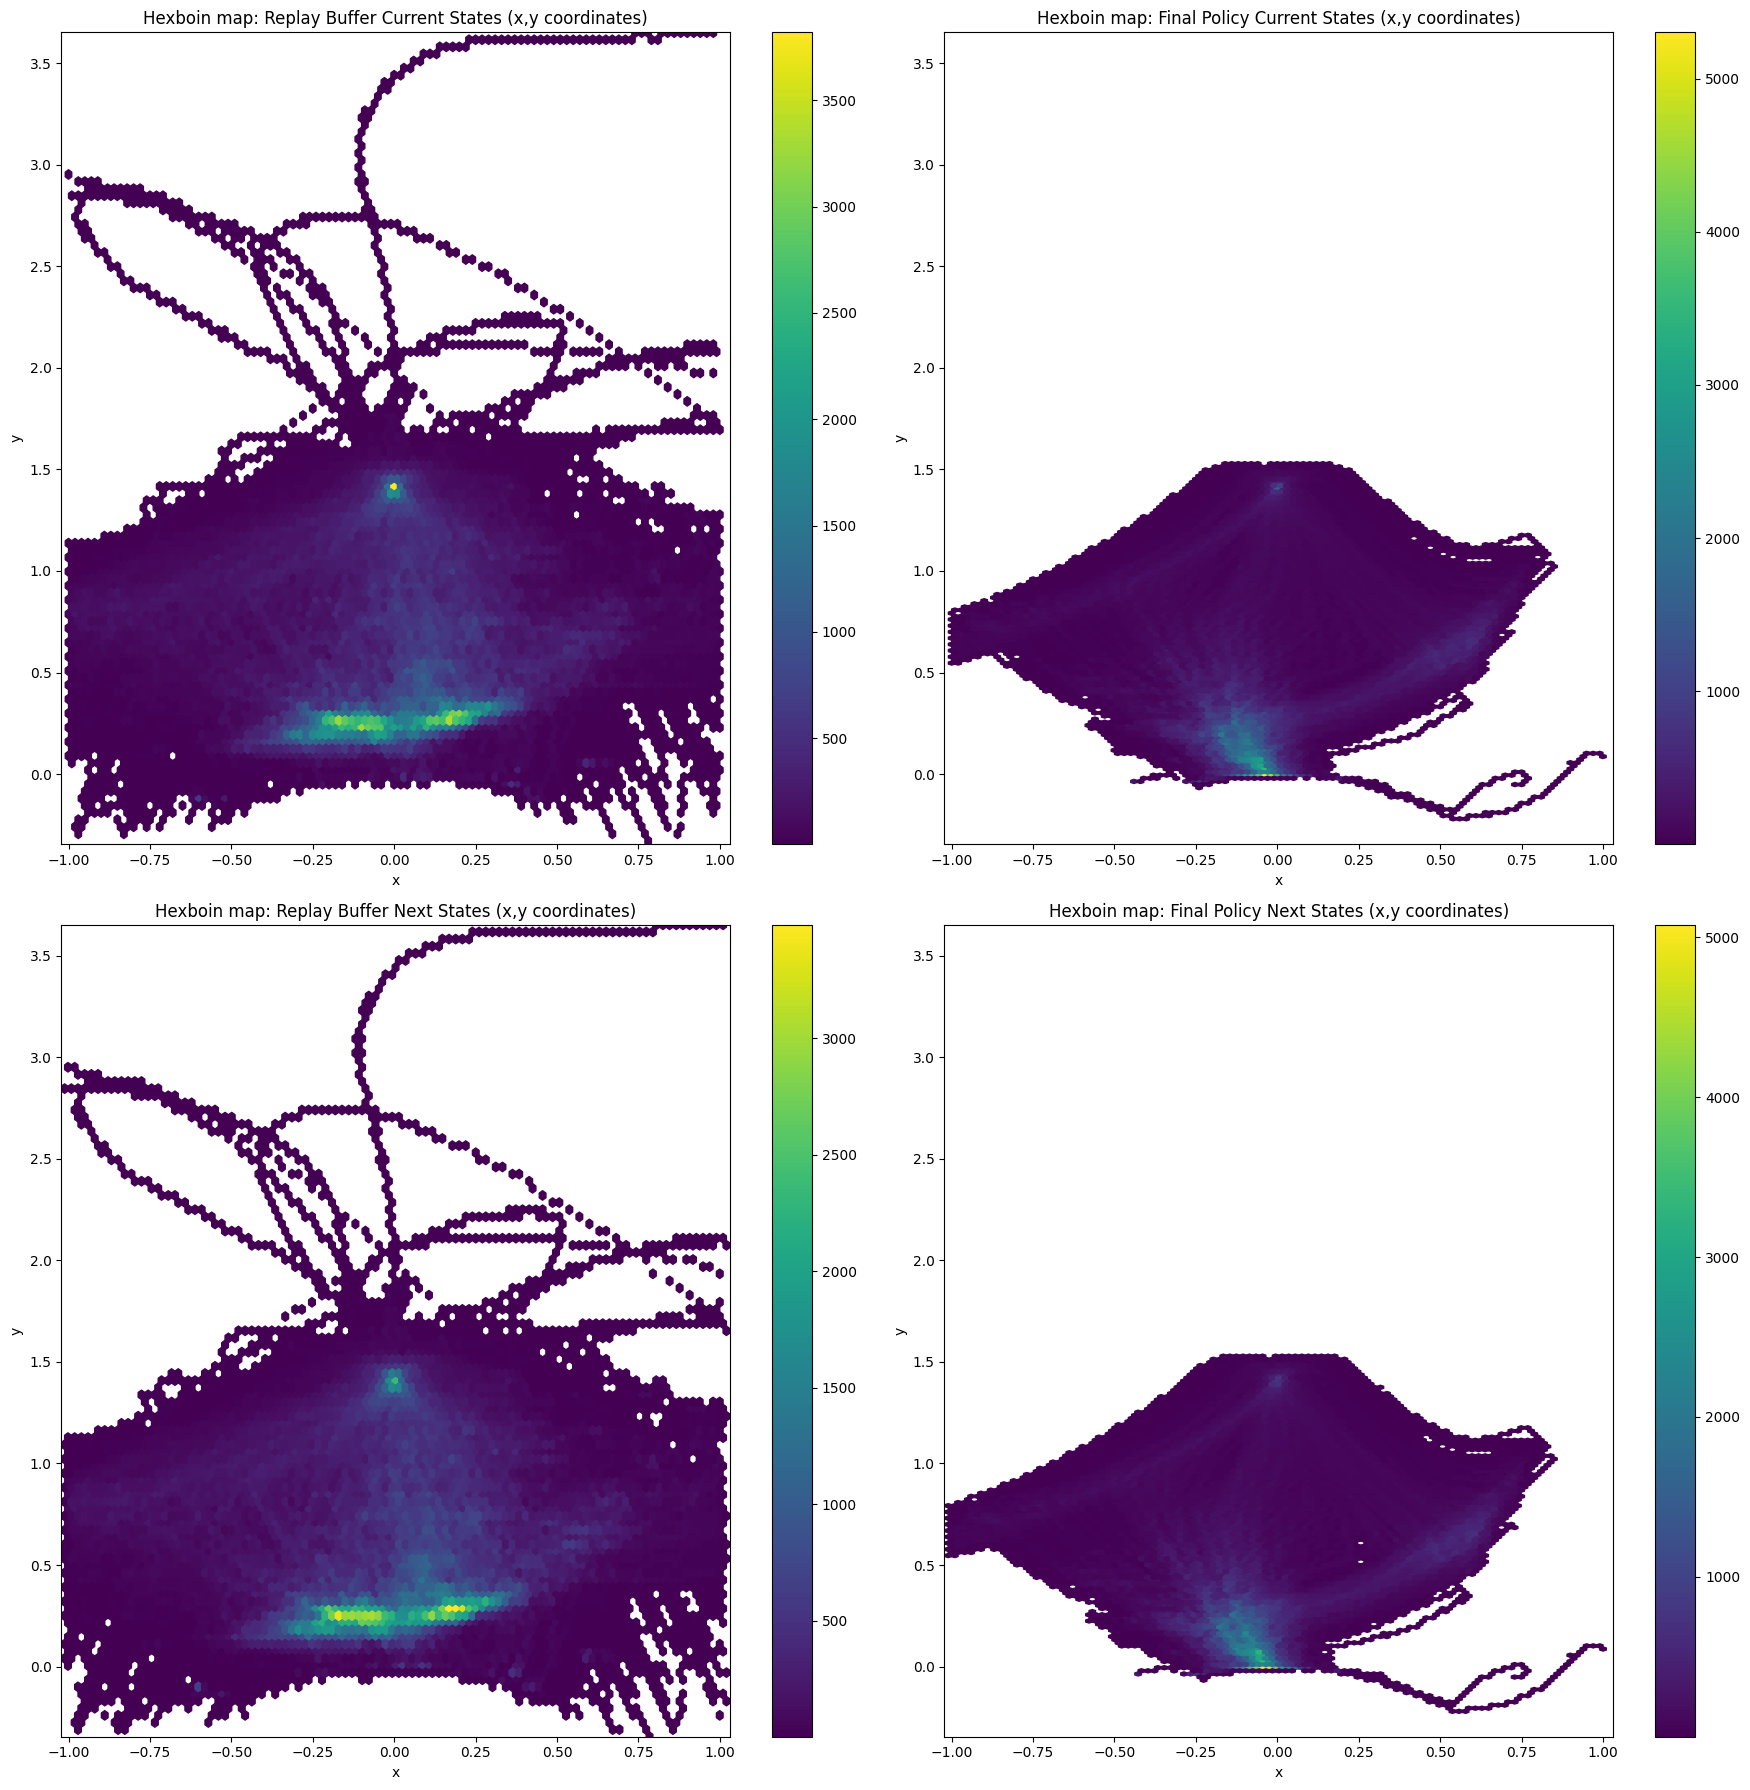

In [8]:
plot_hexbin(state_xy_data_dict, f_size=(18,18))

0it [00:00, ?it/s]

2it [00:06,  3.30s/it]


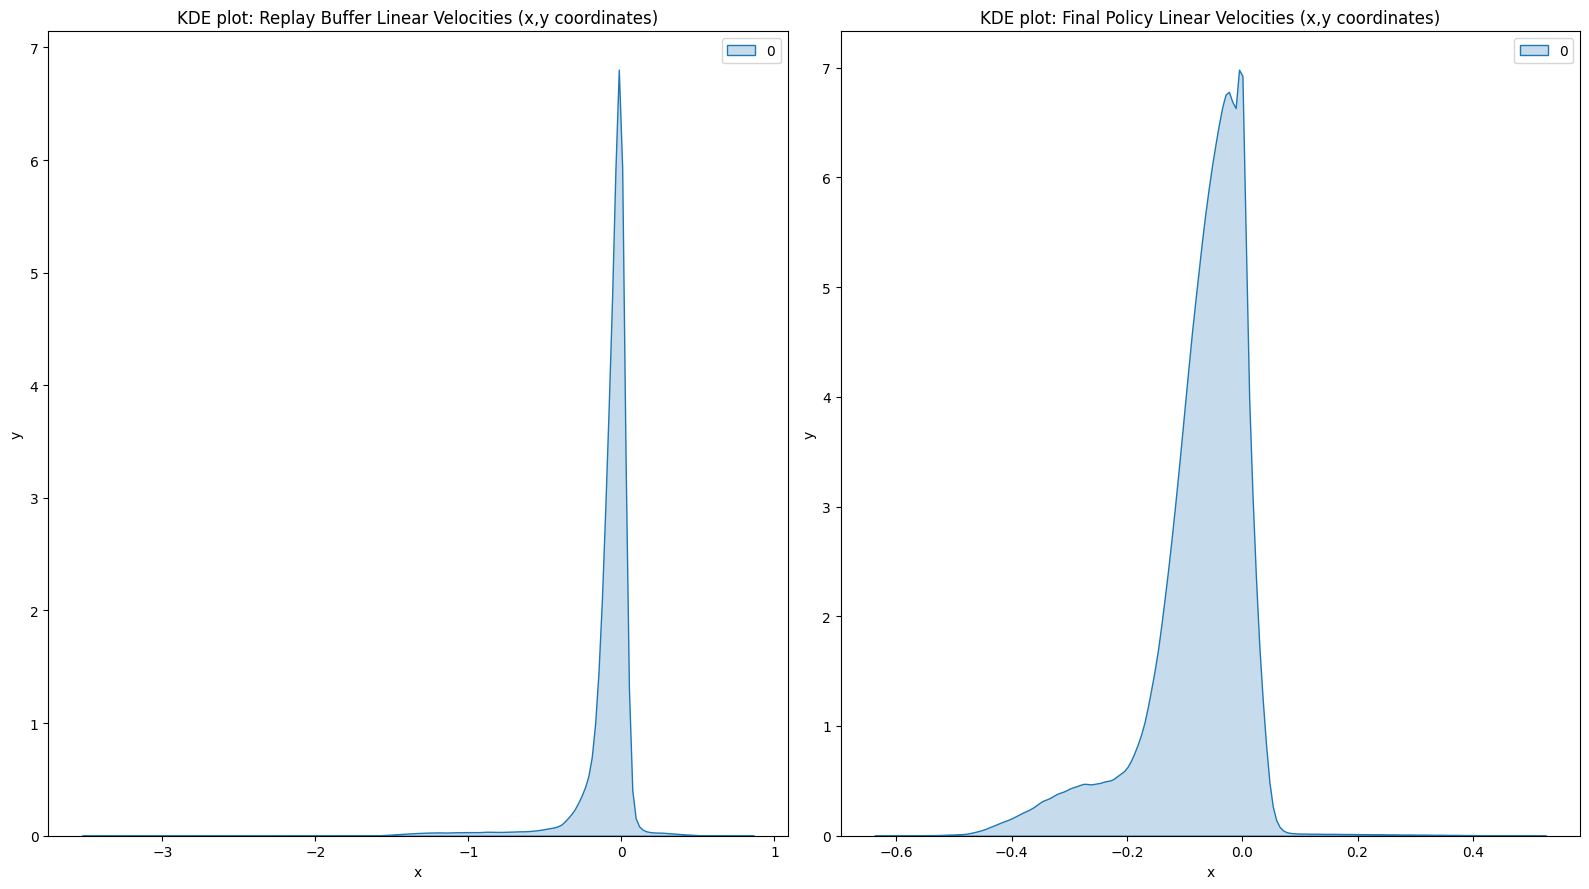

In [9]:
# TODO

#plot_hexbin(velocity_dict)
plot_kde_density(velocity_dict)

IndexError: index 1 is out of bounds for axis 1 with size 1

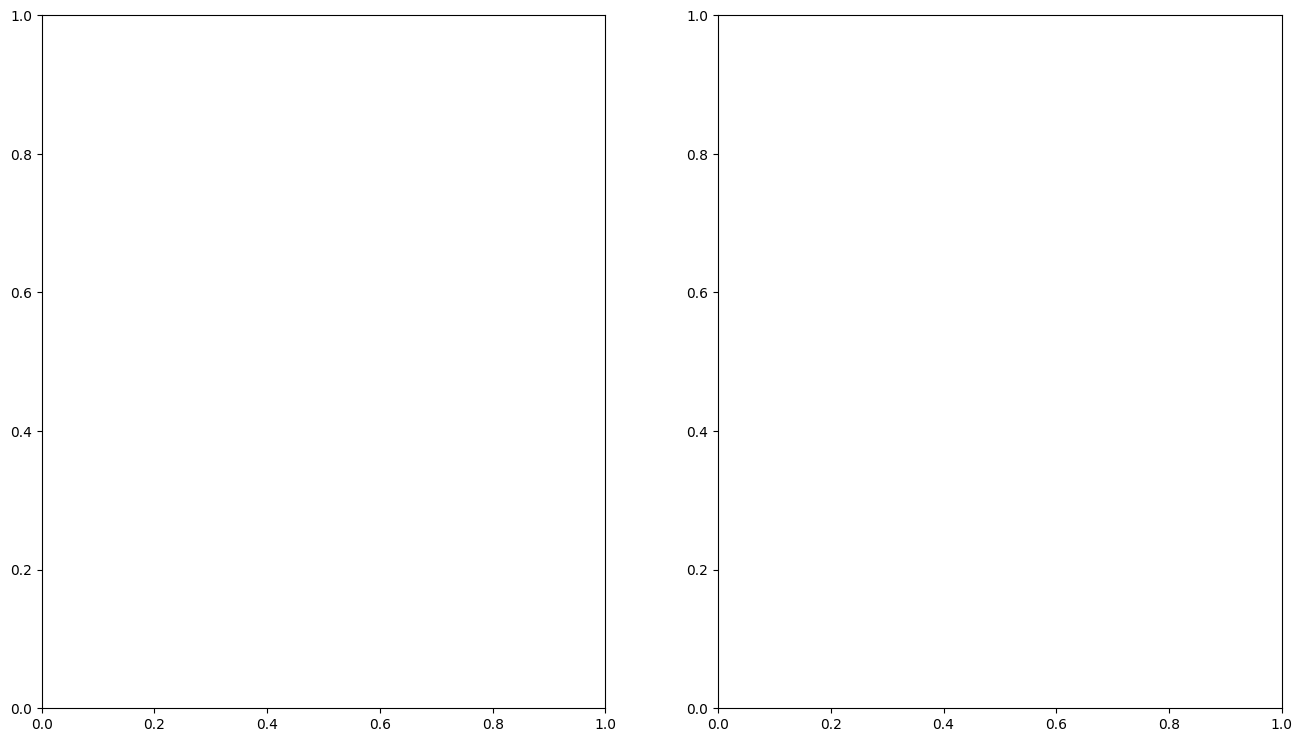

In [13]:
plot_hexbin(velocity_dict)

4it [00:09,  2.32s/it]


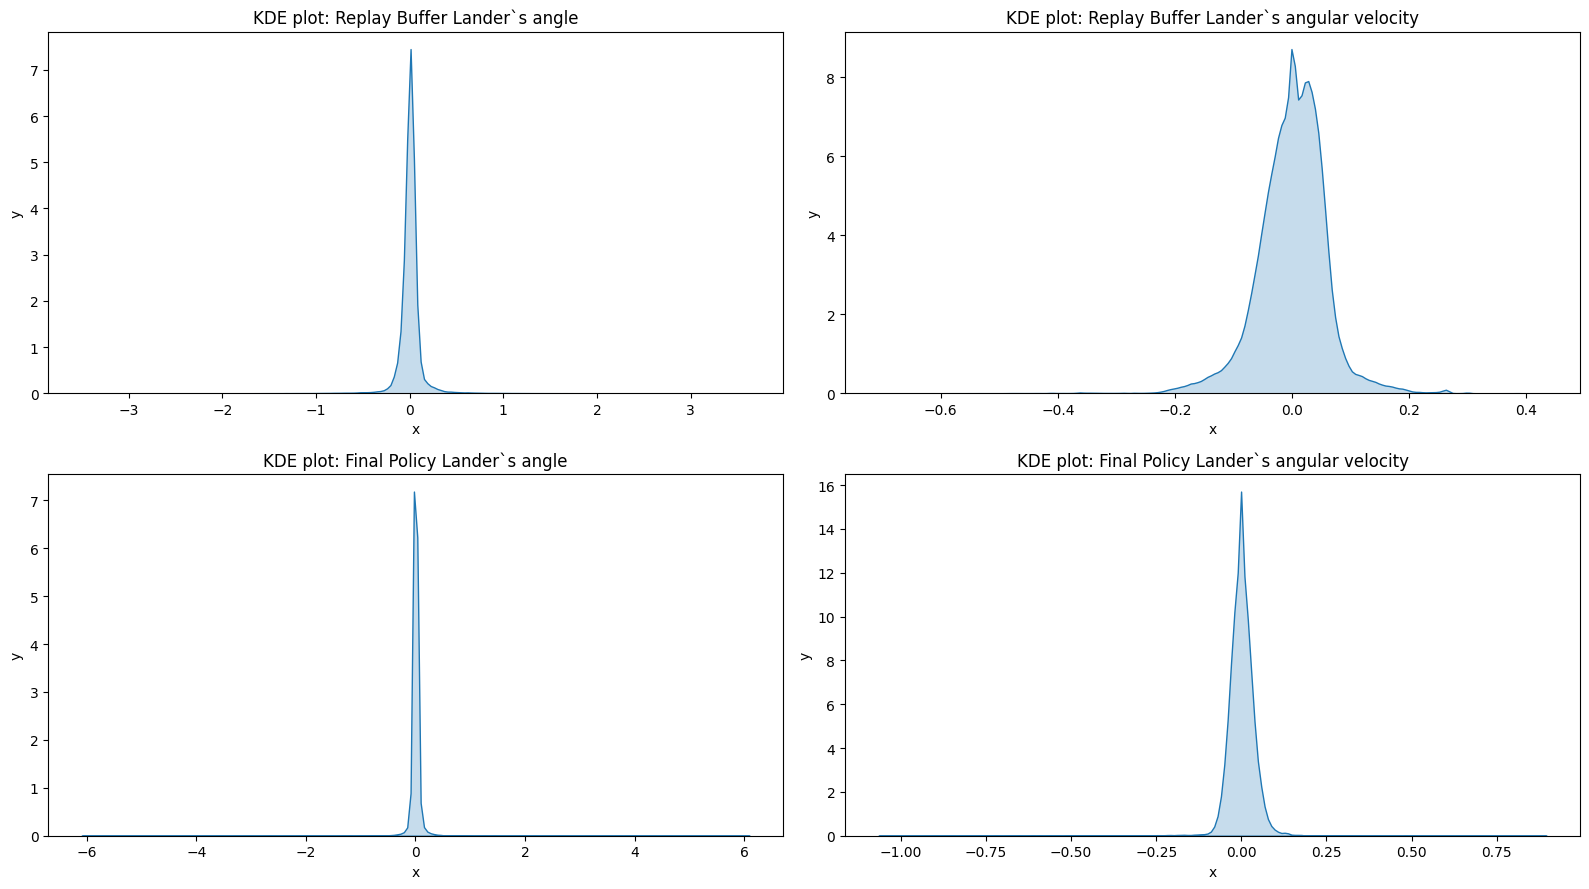

In [10]:
plot_kde_density(angle_dict)